# Dominos

This project was to simulate domino games using different strategies and compare their performance in different scenarios.

#### Beginner strategy:
 - Play the first tile that can be played.

#### Advanced strategy:
 - Play the tile with the lowest probability of the next player having a matching tile given the following:
     - the tiles that have been played,
     - the tiles that the next player has knocked,
     - the tiles in hand.
     - the number of tiles the next player has remaining
     - In cases of a tie play the tile if there's a double else play the first of the tied tiles.
<p>
<p>

<p>
$$ \text{P}(next\ player\ has\ at\ least\ 1\ playable\ tile\ |\ conditions) = 1 - \text{P}(next\ player\ has\ 0\ playable\ tiles)$$

$\text{P}(next\ player\ has\ 0\ playable\ tiles)$ is a combinatorics problem<p> ( N unplayable tiles remaining choose K tiles next player has left ) DIVIDED BY ( N tiles left in the game choose K tiles next player has left )

In [62]:
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

class Domino:
    def __init__(self):
        
        self.rounds = 1
        self.gameover = False
        self.pieces = []
        self.game = []
        self.lock = 0
        self.history = []
        self.probability = {}
        self.prob = {}
        for x in range(7):
            for v in [ (m) for m in range(x, 7) ]:
                self.pieces.append([x,v])
        rd.shuffle(self.pieces)
        self.six = self.pieces.index([6,6])
        self.pl1 = self.pieces[:7]
        self.pl2 = self.pieces[7:14]
        self.pl3 = self.pieces[14:21]
        self.pl4 = self.pieces[21:28]
        self.ptiles = {1:self.pl1,2:self.pl2,3:self.pl3,4:self.pl4}
        if self.six < 7:
            self.history.append('Player 1 starts!')
            #print('Player 1 starts!')
            self.order = [1,2,3,4]
        elif self.six >= 7 and self.six <14:
            self.history.append('Player 2 starts!')
            #print('Player 2 starts!')
            self.order = [2,3,4,1]
        elif self.six >= 14 and self.six <21:
            self.history.append('Player 3 starts!')
            #print('Player 3 starts!')
            self.order = [3,4,1,2]
        else:
            self.history.append('Player 4 starts!')
            #print('Player 4 starts!')
            self.order = [4,1,2,3]


    def play(self,player,amount,switch,front,knock):
        if self.lock>=4:
            self.gameover=True
            self.history.append('LOCKED! WHY you guys Lock the game!?'+\
                                ' Pl1 : '+str(self.pl1)+'Pl2 : '+str(self.pl2)+'Pl3 : '+str(self.pl3)
                  +'Pl4: '+str(self.pl4) +'\n'+' , '+str(self.game))
            #print('LOCKED! WHY you guys Lock the game!?')
            #print('Pl1 : '+str(self.pl1),'Pl2 : '+str(self.pl2),'Pl3 : '+str(self.pl3)
             #     ,'Pl4: '+str(self.pl4) +'\n')
        else:
            if self.gameover:
                self.history.append('Player{} YOU F$#@KIN WON!'.format(self.order[0])+' , '+str(self.game))
                #print('Player{} YOU F$#@KIN WON!'.format(self.order[0]))
            else:
                if knock:
                    self.lock +=1
                    self.history.append('Player{}! You knock!'.format(self.order[0])+' , '+str(self.game))
                    #print('Player{}! You knock!'.format(self.order[0]))
        #        player[0]
                else:
                    try:
                        player.index(amount)
                    except (ValueError):
                        self.history.append("Oops!  You don't have that piece.  Try again..."+' , '+str(self.game))
                        #print("Oops!  You don't have that piece.  Try again...")
            #        self.game.append(self.pl1.pop(self.pl1.index(amount)))
                    self.lock =0
                    player.pop(player.index(amount))
                    if front:
                        self.game.insert(0,sorted(amount, reverse=switch))
                    else:
                        self.game.append(sorted(amount, reverse=switch))
                if len(player)==0:
                    self.gameover=True
                    self.history.append('Player {}-> {}; Player{} YOU F$#@KIN WON!\
                    '.format(self.order[0],amount,self.order[0])+' , '+str(self.game))
                    #print('Player {}-> {}; Player{} YOU F$#@KIN WON!'.format(self.order[0],amount,self.order[0]))
                else:
                    self.order.append(self.order.pop(0))
                    self.history.append('Player {}-> {}; Player{} NEXT!'.format(self.order[-1],amount,self.order[0])+\
                                        ' , '+str(self.game))
                    #print('Player {}-> {}; Player{} NEXT!'.format(self.order[-1],amount,self.order[0]))

In [2]:
def play_what(player,games):
#Function is apply novice strategy for opponents
    for i, val in list(enumerate(player)):
        #print(val[0],val[1],val[1],val[0])
        for ind,v in list(enumerate(val)):
            #print(v)
            if v==games.game[-1][-1]:
                if ind==1:
                    #print(i,ind,v,player[i],sorted(player[i],reverse=True))
                    return player[i], True,False,False
                else:
                    #print(i,ind,v,player[i])
                    return player[i], False,False,False
            elif v==games.game[0][0]:
                if ind==1:
                    #print(i,ind,v,player[i],sorted(player[i],reverse=True))
                    return player[i], False,True,False
                else:
                    #print(i,ind,v,player[i])
                    return player[i], True,True,False
    else:
        return 'Knock', True,True,True

In [3]:
def counts(me):
#counts number of doubles and other number for a given list (e.g. game or player)
    myPieces = []
    [myPieces.append(e) for r,e in me if r==e]
    [myPieces.append(r) for r,e in me if r!=e]
    [myPieces.append(e) for r,e in me if r!=e]
    return np.bincount(myPieces, minlength=7)

In [4]:
def Tables(Game):
#text representation of counts in my hand , on the board and what is remaining to be played
    print('Numbers',list(range(7)),"#s",'#P'
      ,'\n  Pl{} -'.format(Game.order[0]),list(counts(Game.ptiles[Game.order[0]])),\
          sum(counts(Game.ptiles[Game.order[0]])),'',len(Game.ptiles[Game.order[0]]),
      '\n  Board',list(counts(Game.game)),sum(counts(Game.game)),len(Game.game),
     '\n  Left ',[7-(x+y) for (x,y) in zip(list(counts(Game.ptiles[Game.order[0]])),list(counts(Game.game)))],
      '  ',len(Game.pieces)-(len(Game.ptiles[Game.order[0]])+len(Game.game)),
     '\n  Total',[7]*7,'  ',len(Game.pieces) )

In [5]:
def nCk(n,k):
#combinatorics function
    f = math.factorial
    return f(n) // f(k) // f(n-k)    

In [6]:
def pl2knocked(number,game):
#Checks to see if number was ever knocked by player 2
#This is to simulate when you know a player does have a certain tile
#return 0 will remove count of the proposed new end value 
#since we "remember" player 2 doesnt have that piece
#return 1 otherwise for player 2 never knocked that number
    for (x,w) in enumerate(game.history):
        if 'Player{}! You knock!'.format(game.order[1]) in w:
            s=list( game.history[x-1].split('[[') )[1].replace(']]','')
            #print(s[-1],s[0])
            if int(s[-1])==number or int(s[0])==number:
                return 0
            else:
                return 1
    else:
        return 1

In [7]:
def endpoint_tile(tile,games):
#checks whether a tile that matches the values if the hypothetical endpoints has been played then -1 if hasnt.
    for z in [x for x in games.ptiles[games.order[1]]+\
              games.ptiles[games.order[2]]+games.ptiles[games.order[3]]]:
        if z==tile or z==[tile[1],tile[0]]:
            return -1
    else:
        return 0

In [8]:
def all_play(player,games):
    """
Evaluate all playable tile is player 1 hand
Stores new endpoints that would occur if a playable tile was played
Stores the beggining of prob dicitonary that stores the transformation of the tile
in order to play it. Will be used to store probability and tell next function what and how to play 
Chosen tile
"""
    playable_tiles = []
    endpoints = [games.game[0][0],games.game[-1][-1]]
    hypo_endspoints = []
    p=-1
    games.prob={}
    for x in player:
        #print(x)
        if play_what([x],games)[0] != 'Knock':
            playable_tiles.append(x)
    for m in playable_tiles:
        if m[0] == endpoints[0]:
            hypo_endspoints.append([(m,True,True,False),[endpoints[1] ,m[1]]])
            p+=1
            #print(p,m,[endpoints[1] ,m[1]])
            games.prob[p]=[(m,True,True,False),[endpoints[1] ,m[1]]]
        elif m[0] ==endpoints[1]:
            hypo_endspoints.append([(m,False,False,False),[endpoints[0],m[1]]])
            p+=1
            #print(p,m,[endpoints[0],m[1]])
            games.prob[p]=[(m,False,False,False),[endpoints[0],m[1]]]
        #needs be "if" not elif because tile can match on either endpoints..3,4 for tile 3,4
        if m[1] == endpoints[0]:
            hypo_endspoints.append([(m,False,True,False),[endpoints[1] ,m[0]]])
            p+=1
            #print(p,m,[endpoints[1] ,m[0]])
            games.prob[p]=[(m,False,True,False),[endpoints[1] ,m[0]]]
            #print(endpoints[1] ,m[0] )
        elif m[1] ==endpoints[1]:
            hypo_endspoints.append([(m,True,False,False),[endpoints[0],m[0]]])
            p+=1
            #print(p,m,[endpoints[0],m[0]])
            games.prob[p]=[(m,True,False,False),[endpoints[0],m[0]]]
    return hypo_endspoints

In [9]:
def hypo_check(hypo_endpoints,games):
    """
take the new hypothethicalendpoints from valid tile and
returns number of remaining tiles that match those new end points
removes counts where values were knocked
consolidates if tiles a double so returns number of remaining for only 1 value instead of 2
"""
    intersection=0
    b= set(hypo_endpoints) #consolidates to 1 value where doubles
    Remaining=[7-(x+y) for (x,y) in zip(list(counts(games.ptiles[games.order[0]])),list(counts(games.game)))]
    for x in b:
        intersection += Remaining[x]*pl2knocked(x,games)
    ans = intersection+endpoint_tile(hypo_endpoints,games)
    return ans #an integer

In [10]:
def probablilities_Cal(hypo_check,games):
    """
provide endppoints output probability this will be looped
hypo check is an integer 
hypo check is NUMBER of TILEs with new endpont check for dubs,knocks,either_sidePlays
dubs are both endpoints are same number so prob. is only of 1 number
knocks are if ply 2 had knocked then remove number from prob.
either_sidePlas if a tile with different number can be played on either end 3,4 for tile [3,4] prob(4) AND prob(3)
    """
    N = len(games.pieces)-(len(games.ptiles[games.order[0]])+len(games.game))
    N_prime = N - hypo_check
    K = len(games.ptiles[games.order[1]])
    if N_prime >= K:
        return 1-(nCk(N_prime,K)/nCk(N,K))
    else:
        return 1

In [11]:
def play_this(prb):
    """
    Function returns move for double tile if tied for lowest probability 
    else returns move for first tile with lowest probability
    """
    if len(prb)==0:
        return ['oops',[('Knock', True,True,True),'LOL','l','Knock']]
    else:
        for x in prb.items():
            if x[1][3]==min(prb.items(), key=lambda x: x[1][3] )[1][3] and x[1][0][0][0]==x[1][0][0][1]:
                return x
        else:
            return min(prb.items(), key=lambda x: x[1][3])

# You Play a Game

In [22]:
newGame = Domino()
newGame.order

[3, 4, 1, 2]

In [23]:
newGame.pl4

[[0, 2], [5, 6], [1, 5], [3, 6], [0, 0], [4, 5], [2, 3]]

In [24]:
#newGame.play(newGame.pl2,[6,6],False,False,False)
newGame.play(newGame.ptiles[newGame.order[0]],[6,6],False,False,False)

In [25]:
newGame.pl1

[[1, 1], [3, 5], [4, 6], [1, 4], [2, 2], [5, 5], [0, 6]]

In [26]:
#Computers turn
while newGame.order[0]!=1 and newGame.gameover==False :
#for x in range(100):
    #print(len(newGame.game),len(newGame.pieces))
    if newGame.order[0]==4:
        #print('player 4',newGame.pl4)
        print('player 4',play_what(newGame.pl4,newGame))
        newGame.play(newGame.pl4,*play_what(newGame.pl4,newGame))
        #print(newGame.game)
    elif newGame.order[0]==3:
        #print('player 3',newGame.pl3)
        print('player 3',play_what(newGame.pl3,newGame))
        newGame.play(newGame.pl3,*play_what(newGame.pl3,newGame))
        #print(newGame.game)
    elif newGame.order[0]==2:
        #print('player 2',newGame.pl2)
        print('player 2',play_what(newGame.pl2,newGame))
        newGame.play(newGame.pl2,*play_what(newGame.pl2,newGame))
        #print(newGame.game)
    elif newGame.order[0]==1:
        #print('player 1',newGame.pl1)
        print('player 1',play_what(newGame.pl1,newGame))
        newGame.play(newGame.pl1,*play_what(newGame.pl1,newGame))
    #    newGame.play(newGame.pl1,*play_what(newGame.pl1,newGame))
        #print(newGame.game)
print('\n',newGame.game)

player 4 ([5, 6], True, False, False)

 [[6, 6], [6, 5]]


In [27]:
newGame.pl1

[[1, 1], [3, 5], [4, 6], [1, 4], [2, 2], [5, 5], [0, 6]]

In [28]:
print(newGame.game)

[[6, 6], [6, 5]]


In [29]:
Tables(newGame)

Numbers [0, 1, 2, 3, 4, 5, 6] #s #P 
  Pl1 - [1, 2, 1, 1, 2, 2, 2] 11  7 
  Board [0, 0, 0, 0, 0, 1, 2] 3 2 
  Left  [6, 5, 6, 6, 5, 4, 3]    19 
  Total [7, 7, 7, 7, 7, 7, 7]    28


In [30]:
#Generate Probability Dictionary
for i,x in enumerate(all_play(newGame.pl1,newGame)):
    #print(x,hypo_check(x[-1],newGame))
    newGame.prob[i].extend([hypo_check(x[-1],newGame),round(probablilities_Cal(hypo_check(x[-1],newGame),newGame),4)])
    #print(newGame.prob[i])

In [31]:
newGame.prob

{0: [([3, 5], True, False, False), [6, 3], 8, 0.9935],
 1: [([4, 6], False, True, False), [5, 4], 8, 0.9935],
 2: [([5, 5], False, False, False), [6, 5], 7, 0.9843],
 3: [([5, 5], True, False, False), [6, 5], 7, 0.9843],
 4: [([0, 6], False, True, False), [5, 0], 9, 0.9976]}

In [32]:
play_this(newGame.prob)[1][0]

([5, 5], False, False, False)

In [33]:
newGame.play(newGame.pl1,*play_this(newGame.prob)[1][0])

In [34]:
newGame.history

['Player 3 starts!',
 'Player 3-> [6, 6]; Player4 NEXT! , [[6, 6]]',
 'Player 4-> [5, 6]; Player1 NEXT! , [[6, 6], [6, 5]]',
 'Player 1-> [5, 5]; Player2 NEXT! , [[6, 6], [6, 5], [5, 5]]']

In [35]:
#Repeat Computers Turn above

# Simulate a Game

In [36]:
newGame = Domino()
newGame.play(newGame.ptiles[newGame.order[0]],[6,6],False,False,False)

while newGame.gameover==False :
#for x in range(100):
    if newGame.order[0]==4:
        newGame.play(newGame.pl4,*play_what(newGame.pl4,newGame))
    elif newGame.order[0]==3:
        newGame.play(newGame.pl3,*play_what(newGame.pl3,newGame))
    elif newGame.order[0]==2:
        newGame.play(newGame.pl2,*play_what(newGame.pl2,newGame))
    elif newGame.order[0]==1:
        for i,x in enumerate(all_play(newGame.pl1,newGame)):
            newGame.prob[i].extend([hypo_check(x[-1],newGame),\
                                    round(probablilities_Cal(hypo_check(x[-1],newGame),newGame),4)])
        newGame.play(newGame.pl1,*play_this(newGame.prob)[1][0])
        #print(play_this(newGame.prob)[1][3],play_this(newGame.prob)[1][2],play_this(newGame.prob)[1][1])
        newGame.probability[newGame.rounds]= newGame.prob
        newGame.rounds += 1
print(newGame.game)
print('\n')
newGame.history[-1]
# for x in newGame.history:
#     print(x)

[[4, 4], [4, 1], [1, 6], [6, 0], [0, 2], [2, 4], [4, 6], [6, 6], [6, 2], [2, 2], [2, 3], [3, 6], [6, 5], [5, 0], [0, 4], [4, 3], [3, 5], [5, 4]]




'LOCKED! WHY you guys Lock the game!? Pl1 : [[1, 2], [0, 1]]Pl2 : [[1, 3], [0, 0], [1, 1]]Pl3 : [[3, 3], [0, 3]]Pl4: [[5, 5], [1, 5], [2, 5]]\n , [[4, 4], [4, 1], [1, 6], [6, 0], [0, 2], [2, 4], [4, 6], [6, 6], [6, 2], [2, 2], [2, 3], [3, 6], [6, 5], [5, 0], [0, 4], [4, 3], [3, 5], [5, 4]]'

# Simulate  a lot of Games
### Scenario1 : 500,500 Games where only Player 1 uses Advanced Strategy

In [37]:
##Only player1 Advanced Strategy
##Scenario 1
saves={}
for  f in range(1000):
    if (f+1)%200==0:
        print(f+1)
    Wins1=0
    Wins2=0
    Wins3=0
    Wins4=0
    Locks=0
    HGames = 0
    p1locks=0
    p2locks=0
    p3locks=0
    p4locks=0
    for z in range(f+1):
        HGames += 1
        newGame = Domino()
        newGame.play(newGame.ptiles[newGame.order[0]],[6,6],False,False,False)
        
        while newGame.gameover==False :
        #for x in range(100):
            if newGame.order[0]==4:
                newGame.play(newGame.pl4,*play_what(newGame.pl4,newGame))
            elif newGame.order[0]==3:
                newGame.play(newGame.pl3,*play_what(newGame.pl3,newGame))
            elif newGame.order[0]==2:
                newGame.play(newGame.pl2,*play_what(newGame.pl2,newGame))
            elif newGame.order[0]==1:
                for i,x in enumerate(all_play(newGame.pl1,newGame)):
                    newGame.prob[i].extend([hypo_check(x[-1],newGame),\
                                            round(probablilities_Cal(hypo_check(x[-1],newGame),newGame),4)])
                newGame.play(newGame.pl1,*play_this(newGame.prob)[1][0])
                #print(play_this(newGame.prob)[1][3],play_this(newGame.prob)[1][2],play_this(newGame.prob)[1][1])
                newGame.probability[newGame.rounds]= newGame.prob
                newGame.rounds += 1
        #print(newGame.game)
        if 'Player1 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins1 += 1
        if 'Player2 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins2 += 1
        if 'Player3 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins3 += 1
        if 'Player4 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins4 += 1
        if 'LOCKED! WHY' in newGame.history[-1]:
            Locks += 1
            if 'Player 4->' in newGame.history[-2]:
                p4locks += 1
            elif 'Player 3->' in newGame.history[-2]:
                p3locks += 1
            elif 'Player 2->' in newGame.history[-2]:
                p2locks += 1
            elif 'Player 1->' in newGame.history[-2]:
                p1locks += 1
        saves[f+1] = {1:Wins1,2:Wins2,3:Wins3,4:Wins4,5:Locks,6:HGames,'p4locks':p4locks,
                     'p3locks':p3locks,'p2locks':p2locks,'p1locks':p1locks}

200
400
600
800
1000


# Win rates per sample
### How effective was the advanced strategy?

Win rate Player 1 : 0.217303641056
Win rate Player 2 : 0.126797014348
Win rate Player 3 : 0.156546450735
Win rate Player 4 : 0.170935725452
Lock rate : 0.32841716841


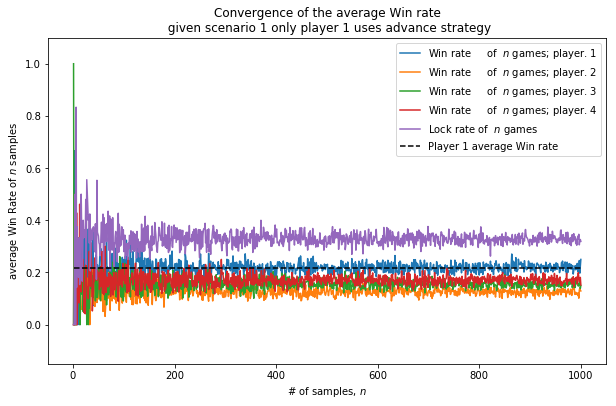

In [39]:
sample_size = len(saves.keys())
expected_value = np.mean([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])

N_samples = [ saves[x+1][6] for x in range(sample_size)]
#set figure size
plt.figure(figsize=(10,6))
for k in range(5):
    if k ==4:
        print('Lock rate :',np.mean([ saves[x+1][k+1]/saves[x+1][6] for x in range(sample_size)]))
    else:        
        print('Win rate Player',k+1,':',np.mean([ saves[x+1][k+1]/saves[x+1][6] for x in range(sample_size)]))
        #samples = poi( lambda_, sample_size ) 

        partial_average = [ saves[x+1][k+1]/saves[x+1][6] for x in range(sample_size)]

        plt.plot( N_samples, partial_average, lw=1.5,label="Win rate \
    of  $n$ games; player. {}".format(k+1))
    
partial_average = [ saves[x+1][5]/saves[x+1][6] for x in range(sample_size)]
plt.plot( N_samples, partial_average, lw=1.5,label="Lock rate \
of  $n$ games")
plt.plot( N_samples, expected_value*np.ones_like( partial_average), 
    ls = "--", label = "Player 1 average Win rate", c = "k" )

plt.ylim( -0.15, 1.1) 
plt.title( "Convergence of the average Win rate\n given scenario 1 \
only player 1 uses advance strategy" )
plt.ylabel( "average Win Rate of $n$ samples" )
plt.xlabel( "# of samples, $n$")
plt.legend();

# Player caused lock rates per sample
### Did the advanced strategy cause more locks?

Lock rate of Player  p1locks : 0.476291936811
Lock rate of Player  p2locks : 0.176769824934
Lock rate of Player  p3locks : 0.174994065094
Lock rate of Player  p4locks : 0.168925626329


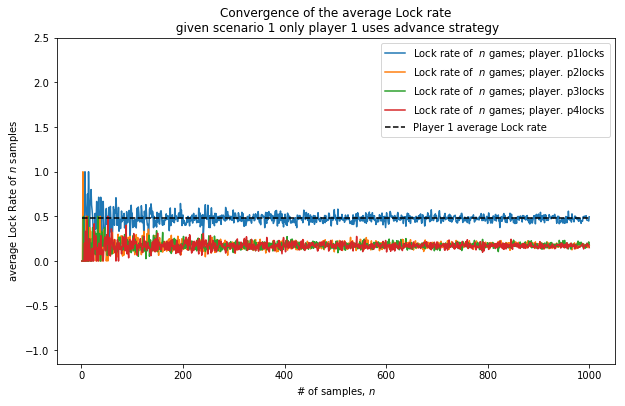

In [41]:
N_samples = [ saves[x+1][6] for x in range(sample_size)]
expected_value = np.mean([ saves[x+1]['p1locks']/(saves[x+1][5]+.001) for x in range(sample_size)])
plt.figure(figsize=(10,6))
for k in ['p1locks','p2locks','p3locks','p4locks']:
    print('Lock rate of Player ',k,':',np.mean([ saves[x+1][k]/(saves[x+1][5]+.001) for x in range(sample_size)]))
    #samples = poi( lambda_, sample_size ) 
    
    partial_average = [ saves[x+1][k]/(saves[x+1][5]+.001) for x in range(sample_size)]
    
    plt.plot( N_samples, partial_average, lw=1.5,label="Lock rate \
of  $n$ games; player. {}".format(k))
    
    
# partial_average = [ saves[x+1]['p1locks']/(saves[x+1][5]+.001) for x in range(sample_size)]
# plt.plot( N_samples, partial_average, lw=1.5,label="Locked rate \
# of  $n$ games")

plt.plot( N_samples, expected_value*np.ones_like( partial_average), 
    ls = "--", label = "Player 1 average Lock rate", c = "k" )

plt.ylim( -1.15, 2.5) 
plt.title( "Convergence of the average Lock rate\n given scenario 1 \
only player 1 uses advance strategy" )
plt.ylabel( "average Lock Rate of $n$ samples" )
plt.xlabel( "# of samples, $n$")
plt.legend();

In [42]:
print('Player 1:\n','Variance:',np.var([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])
,'\n','St.Dev:',np.std([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)]))

Player 1:
 Variance: 0.00136048560534 
 St.Dev: 0.0368847611533


In [43]:
print('Player 1 CI.95:\n',expected_value-1.95*\
      (np.std([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)),
      expected_value+1.95*(np.std([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)) )

Player 1 CI.95:
 0.474017459615 0.478566414006


In [44]:
p2mu = np.mean([ saves[x+1][2]/saves[x+1][6] for x in range(sample_size)])

print('Player 2 CI.95:\n',p2mu-1.95*\
      (np.std([ saves[x+1][2]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)),
      p2mu+1.95*(np.std([ saves[x+1][2]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)) )

Player 2 CI.95:
 0.125147329182 0.128446699514


# Scenario 2:
###  500,500 Games where everyone uses basic strategy (play first playable tile)

In [45]:
##### Everyone Basic strategy
## Scenario 2
saves={}
for  f in range(1000):
    if (f+1)%200==0:
        print(f+1)
    Wins1=0
    Wins2=0
    Wins3=0
    Wins4=0
    Locks=0
    HGames = 0
    p1locks=0
    p2locks=0
    p3locks=0
    p4locks=0
    for z in range(f+1):
        HGames += 1
        newGame = Domino()
        newGame.play(newGame.ptiles[newGame.order[0]],[6,6],False,False,False)

        while newGame.gameover==False :
        #for x in range(100):
            if newGame.order[0]==4:
                newGame.play(newGame.pl4,*play_what(newGame.pl4,newGame))
            elif newGame.order[0]==3:
                newGame.play(newGame.pl3,*play_what(newGame.pl3,newGame))
            elif newGame.order[0]==2:
                newGame.play(newGame.pl2,*play_what(newGame.pl2,newGame))
            elif newGame.order[0]==1:
                for i,x in enumerate(all_play(newGame.pl1,newGame)):
                    newGame.prob[i].extend([hypo_check(x[-1],newGame),round(probablilities_Cal(hypo_check(x[-1],newGame),newGame),4)])
                newGame.play(newGame.pl1,*play_what(newGame.pl1,newGame))
                #print(play_this(newGame.prob)[1][3],play_this(newGame.prob)[1][2],play_this(newGame.prob)[1][1])
                newGame.probability[newGame.rounds]= newGame.prob
                newGame.rounds += 1
        #print(newGame.game)
        if 'Player1 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins1 += 1
        if 'Player2 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins2 += 1
        if 'Player3 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins3 += 1
        if 'Player4 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins4 += 1
        if 'LOCKED! WHY' in newGame.history[-1]:
            Locks += 1
            if 'Player 4->' in newGame.history[-2]:
                p4locks += 1
            elif 'Player 3->' in newGame.history[-2]:
                p3locks += 1
            elif 'Player 2->' in newGame.history[-2]:
                p2locks += 1
            elif 'Player 1->' in newGame.history[-2]:
                p1locks += 1
        saves[f+1] = {1:Wins1,2:Wins2,3:Wins3,4:Wins4,5:Locks,6:HGames,'p4locks':p4locks,
                     'p3locks':p3locks,'p2locks':p2locks,'p1locks':p1locks}

200
400
600
800
1000


# S2: Win rates per sample
### Any clear winner?

Win rate Player 1 : 0.192439385566
Win rate Player 2 : 0.190598690061
Win rate Player 3 : 0.189182659052
Win rate Player 4 : 0.190988768897
Lock rate : 0.236790496424


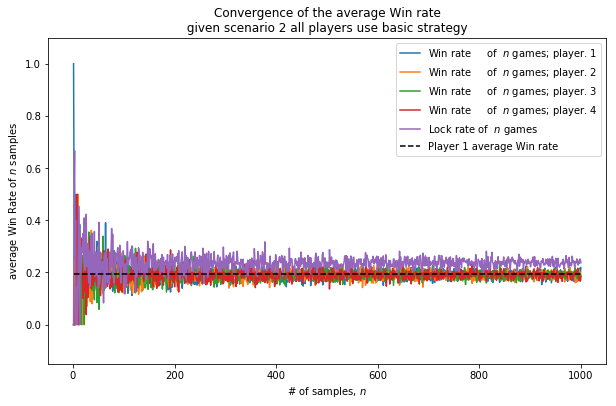

In [47]:
sample_size = len(saves.keys())
expected_value = np.mean([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])

N_samples = [ saves[x+1][6] for x in range(sample_size)]
#set figure size
plt.figure(figsize=(10,6))
for k in range(5):
    if k ==4:
        print('Lock rate :',np.mean([ saves[x+1][k+1]/saves[x+1][6] for x in range(sample_size)]))
    else:        
        print('Win rate Player',k+1,':',np.mean([ saves[x+1][k+1]/saves[x+1][6] for x in range(sample_size)]))
        #samples = poi( lambda_, sample_size ) 

        partial_average = [ saves[x+1][k+1]/saves[x+1][6] for x in range(sample_size)]

        plt.plot( N_samples, partial_average, lw=1.5,label="Win rate \
    of  $n$ games; player. {}".format(k+1))
    
partial_average = [ saves[x+1][5]/saves[x+1][6] for x in range(sample_size)]
plt.plot( N_samples, partial_average, lw=1.5,label="Lock rate \
of  $n$ games")
plt.plot( N_samples, expected_value*np.ones_like( partial_average), 
    ls = "--", label = "Player 1 average Win rate", c = "k" )

plt.ylim( -0.15, 1.1) 
plt.title( "Convergence of the average Win rate\n given scenario 2 \
all players use basic strategy " )
plt.ylabel( "average Win Rate of $n$ samples" )
plt.xlabel( "# of samples, $n$")
plt.legend();

# S2: Player caused lock rates per sample
### Did any player cause more locks?

Lock rate Player p1locks : 0.251681827602
Lock rate Player p2locks : 0.248063100947
Lock rate Player p3locks : 0.249029463323
Lock rate Player p4locks : 0.247201146315


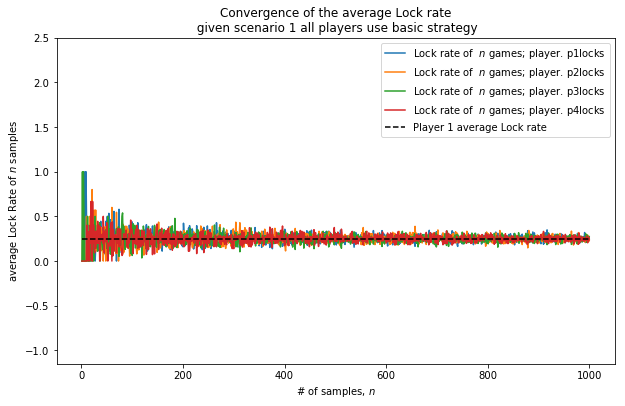

In [48]:
N_samples = [ saves[x+1][6] for x in range(sample_size)]
expected_value = np.mean([ saves[x+1]['p1locks']/(saves[x+1][5]+.001) for x in range(sample_size)])
plt.figure(figsize=(10,6))
for k in ['p1locks','p2locks','p3locks','p4locks']:
    print('Lock rate Player',k,':',np.mean([ saves[x+1][k]/(saves[x+1][5]+.001) for x in range(sample_size)]))
    #samples = poi( lambda_, sample_size ) 
    
    partial_average = [ saves[x+1][k]/(saves[x+1][5]+.001) for x in range(sample_size)]
    
    plt.plot( N_samples, partial_average, lw=1.5,label="Lock rate \
of  $n$ games; player. {}".format(k))
    
    
# partial_average = [ saves[x+1]['p1locks']/(saves[x+1][5]+.001) for x in range(sample_size)]
# plt.plot( N_samples, partial_average, lw=1.5,label="Locked rate \
# of  $n$ games")

plt.plot( N_samples, expected_value*np.ones_like( partial_average), 
    ls = "--", label = "Player 1 average Lock rate", c = "k" )

plt.ylim( -1.15, 2.5) 
plt.title( "Convergence of the average Lock rate\n given scenario 1 \
all players use basic strategy" )
plt.ylabel( "average Lock Rate of $n$ samples" )
plt.xlabel( "# of samples, $n$")
plt.legend();

In [49]:
print(expected_value-1.95*(np.std([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)),
      expected_value+1.95*(np.std([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)) )

0.249259866724 0.25410378848


In [50]:
p2mu = np.mean([ saves[x+1][2]/saves[x+1][6] for x in range(sample_size)])

print('Player 2 CI.95:\n',p2mu-1.95*\
      (np.std([ saves[x+1][2]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)),
      p2mu+1.95*(np.std([ saves[x+1][2]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)) )

Player 2 CI.95:
 0.188735821544 0.192461558578


# Scenario 3: 
#### Everyone plays Advanced strategy (play tile with lowest probability)

In [51]:
#####Everyone ADVANCED
## Scenario 3
saves={}
for  f in range(1000):
    if (f+1)%200==0:
        print(f+1)
    Wins1=0
    Wins2=0
    Wins3=0
    Wins4=0
    Locks=0
    HGames = 0
    p1locks=0
    p2locks=0
    p3locks=0
    p4locks=0
    for z in range(f+1):
        HGames += 1
        newGame = Domino()
        newGame.play(newGame.ptiles[newGame.order[0]],[6,6],False,False,False)
        
        while newGame.gameover==False :
        #for x in range(100):
            if newGame.order[0]==4:
                #newGame.play(newGame.pl4,*play_what(newGame.pl4,newGame))
                newGame.prob={}
                for i,x in enumerate(all_play(newGame.pl4,newGame)):
                    newGame.prob[i].extend([hypo_check(x[-1],newGame),round(probablilities_Cal(hypo_check(x[-1],newGame),newGame),4)])
                newGame.play(newGame.pl4,*play_this(newGame.prob)[1][0])
            elif newGame.order[0]==3:
                #newGame.play(newGame.pl3,*play_what(newGame.pl3,newGame))
                newGame.prob={}
                for i,x in enumerate(all_play(newGame.pl3,newGame)):
                    newGame.prob[i].extend([hypo_check(x[-1],newGame),round(probablilities_Cal(hypo_check(x[-1],newGame),newGame),4)])
                newGame.play(newGame.pl3,*play_this(newGame.prob)[1][0])
            elif newGame.order[0]==2:
                #newGame.play(newGame.pl2,*play_what(newGame.pl2,newGame))
                newGame.prob={}
                for i,x in enumerate(all_play(newGame.pl2,newGame)):
                    newGame.prob[i].extend([hypo_check(x[-1],newGame),round(probablilities_Cal(hypo_check(x[-1],newGame),newGame),4)])
                newGame.play(newGame.pl2,*play_this(newGame.prob)[1][0])
            elif newGame.order[0]==1:
                newGame.prob={}
                for i,x in enumerate(all_play(newGame.pl1,newGame)):
                    newGame.prob[i].extend([hypo_check(x[-1],newGame),round(probablilities_Cal(hypo_check(x[-1],newGame),newGame),4)])
                #newGame.play(newGame.pl1,*play_what(newGame.pl1,newGame))
                newGame.play(newGame.pl1,*play_this(newGame.prob)[1][0])
                #print(play_this(newGame.prob)[1][3],play_this(newGame.prob)[1][2],play_this(newGame.prob)[1][1])
                newGame.probability[newGame.rounds]= newGame.prob
                newGame.rounds += 1
        #print(newGame.game)
        if 'Player1 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins1 += 1
        if 'Player2 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins2 += 1
        if 'Player3 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins3 += 1
        if 'Player4 YOU F$#@KIN WON!' in newGame.history[-1]:
            Wins4 += 1
        if 'LOCKED! WHY' in newGame.history[-1]:
            Locks += 1
            if 'Player 4->' in newGame.history[-2]:
                p4locks += 1
            elif 'Player 3->' in newGame.history[-2]:
                p3locks += 1
            elif 'Player 2->' in newGame.history[-2]:
                p2locks += 1
            elif 'Player 1->' in newGame.history[-2]:
                p1locks += 1
        saves[f+1] = {1:Wins1,2:Wins2,3:Wins3,4:Wins4,5:Locks,6:HGames,'p4locks':p4locks,
                     'p3locks':p3locks,'p2locks':p2locks,'p1locks':p1locks}

200
400
600
800
1000


Win rate Player 1 : 0.120665493024
Win rate Player 2 : 0.120803417733
Win rate Player 3 : 0.121097952451
Win rate Player 4 : 0.120916309595
Lock rate : 0.516516827197


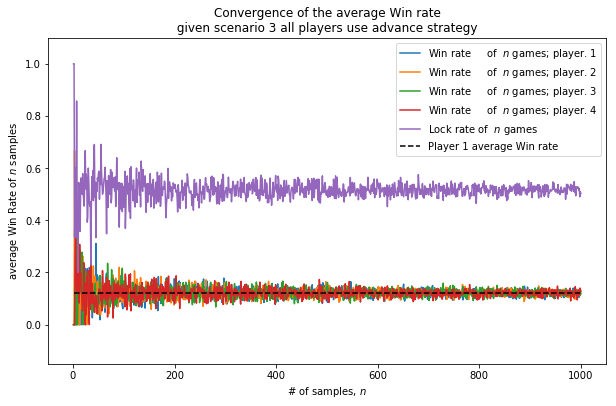

In [53]:
sample_size = len(saves.keys())
expected_value = np.mean([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])

N_samples = [ saves[x+1][6] for x in range(sample_size)]
#set figure size
plt.figure(figsize=(10,6))
for k in range(5):
    if k ==4:
        print('Lock rate :',np.mean([ saves[x+1][k+1]/saves[x+1][6] for x in range(sample_size)]))
    else:        
        print('Win rate Player',k+1,':',np.mean([ saves[x+1][k+1]/saves[x+1][6] for x in range(sample_size)]))
        #samples = poi( lambda_, sample_size ) 

        partial_average = [ saves[x+1][k+1]/saves[x+1][6] for x in range(sample_size)]

        plt.plot( N_samples, partial_average, lw=1.5,label="Win rate \
    of  $n$ games; player. {}".format(k+1))
    
partial_average = [ saves[x+1][5]/saves[x+1][6] for x in range(sample_size)]
plt.plot( N_samples, partial_average, lw=1.5,label="Lock rate \
of  $n$ games")
plt.plot( N_samples, expected_value*np.ones_like( partial_average), 
    ls = "--", label = "Player 1 average Win rate", c = "k" )

plt.ylim( -0.15, 1.1) 
plt.title( "Convergence of the average Win rate\n given scenario 3 \
all players use advance strategy " )
plt.ylabel( "average Win Rate of $n$ samples" )
plt.xlabel( "# of samples, $n$")
plt.legend();

Lock rate Player p4locks : 0.248530611279
Lock rate Player p3locks : 0.251237141754
Lock rate Player p2locks : 0.248463742853
Lock rate Player p1locks : 0.251754428843


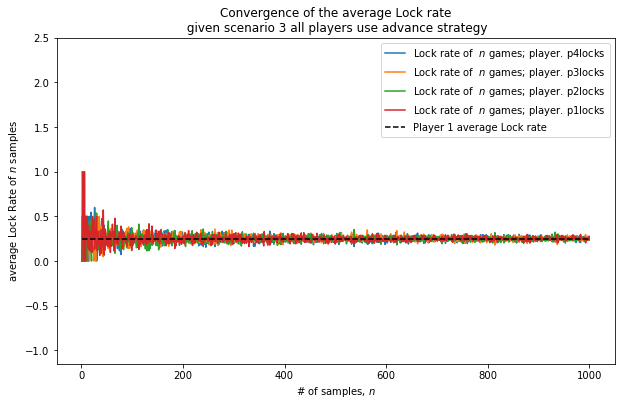

In [63]:
N_samples = [ saves[x+1][6] for x in range(sample_size)]
expected_value = np.mean([ saves[x+1]['p1locks']/(saves[x+1][5]+.001) for x in range(sample_size)])
plt.figure(figsize=(10,6))
for k in ['p4locks','p3locks','p2locks','p1locks']:
    print('Lock rate Player',k,':',np.mean([ saves[x+1][k]/(saves[x+1][5]+.001) for x in range(sample_size)]))
    #samples = poi( lambda_, sample_size ) 
    
    partial_average = [ saves[x+1][k]/(saves[x+1][5]+.001) for x in range(sample_size)]
    
    plt.plot( N_samples, partial_average, lw=1.5,label="Lock rate \
of  $n$ games; player. {}".format(k))
    
    
# partial_average = [ saves[x+1]['p1locks']/(saves[x+1][5]+.001) for x in range(sample_size)]
# plt.plot( N_samples, partial_average, lw=1.5,label="Locked rate \
# of  $n$ games")

plt.plot( N_samples, expected_value*np.ones_like( partial_average), 
    ls = "--", label = "Player 1 average Lock rate", c = "k" )

plt.ylim( -1.15, 2.5) 
plt.title( "Convergence of the average Lock rate\n given scenario 3 \
all players use advance strategy" )
plt.ylabel( "average Lock Rate of $n$ samples" )
plt.xlabel( "# of samples, $n$")
plt.legend();

In [55]:
print(expected_value-1.95*(np.std([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)),
      expected_value+1.95*(np.std([ saves[x+1][1]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)) )

0.250080528765 0.253428328921


In [56]:
p2mu = np.mean([ saves[x+1][2]/saves[x+1][6] for x in range(sample_size)])
print(p2mu-1.95*(np.std([ saves[x+1][2]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)),
      p2mu+1.95*(np.std([ saves[x+1][2]/saves[x+1][6] for x in range(sample_size)])/np.sqrt(sample_size)) )

0.118909236115 0.122697599351


In [57]:
print(Wins1,Wins2,Wins3,Wins4,Locks,HGames)
print(Wins1/saves[1000][6] ,Wins2/saves[1000][6] ,Wins3/saves[1000][6], Wins4/saves[1000][6]\
      , Locks/saves[1000][6], HGames/saves[1000][6])

120 121 128 128 503 1000
0.12 0.121 0.128 0.128 0.503 1.0


In [58]:
newGame.history

['Player 4 starts!',
 'Player 4-> [6, 6]; Player1 NEXT! , [[6, 6]]',
 'Player 1-> [0, 6]; Player2 NEXT! , [[0, 6], [6, 6]]',
 'Player 2-> [0, 0]; Player3 NEXT! , [[0, 0], [0, 6], [6, 6]]',
 'Player 3-> [1, 6]; Player4 NEXT! , [[0, 0], [0, 6], [6, 6], [6, 1]]',
 'Player 4-> [1, 4]; Player1 NEXT! , [[0, 0], [0, 6], [6, 6], [6, 1], [1, 4]]',
 'Player 1-> [0, 1]; Player2 NEXT! , [[1, 0], [0, 0], [0, 6], [6, 6], [6, 1], [1, 4]]',
 'Player 2-> [2, 4]; Player3 NEXT! , [[1, 0], [0, 0], [0, 6], [6, 6], [6, 1], [1, 4], [4, 2]]',
 'Player 3-> [2, 2]; Player4 NEXT! , [[1, 0], [0, 0], [0, 6], [6, 6], [6, 1], [1, 4], [4, 2], [2, 2]]',
 'Player 4-> [0, 2]; Player1 NEXT! , [[1, 0], [0, 0], [0, 6], [6, 6], [6, 1], [1, 4], [4, 2], [2, 2], [2, 0]]',
 'Player 1-> [1, 2]; Player2 NEXT! , [[2, 1], [1, 0], [0, 0], [0, 6], [6, 6], [6, 1], [1, 4], [4, 2], [2, 2], [2, 0]]',
 'Player 2-> [2, 6]; Player3 NEXT! , [[6, 2], [2, 1], [1, 0], [0, 0], [0, 6], [6, 6], [6, 1], [1, 4], [4, 2], [2, 2], [2, 0]]',
 'Player 3-

In [59]:
##STOP HERE###

In [60]:
#if known playing next tile will lock game is there an alternative tile? What are win rates there?
##how many rounds a game

## Future Study:
    - Modify strategy by playing different tile if tile with lowest probability will lock game
    maybe that player 1 would lose if it doesnt lock game